In [1]:
# Lesson_LinearRegression_boston

from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
# import sklearn as skl
# model = skl.linear_model.LinearRegression
# from sklearn import linear_model as lm
# model = lm.LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
# 데이터 로드
boston = load_boston()
# CRIM: 범죄율
# INDUS: 비소매상업지역 면적 비율
# NOX: 일산화질소 농도
# RM: 주택당 방 수
# LSTAT: 인구 중 하위 계층 비율
# B: 인구 중 흑인 비율
# PTRATIO: 학생/교사 비율
# ZN: 25,000 평방피트를 초과 거주지역 비율
# CHAS: 찰스강의 경계에 위치한 경우는 1, 아니면 0
# AGE: 1940년 이전에 건축된 주택의 비율
# RAD: 방사형 고속도로까지의 거리
# DIS: 직업센터의 거리
# TAX: 재산세율

In [3]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.DataFrame(boston.target, columns=["MEDV"])
X.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


In [4]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [5]:
# Linear Regression 클래스 객체 생성
model = LinearRegression() # fit_intercept = 상수항 유무 결정

# fit 메서드로 모형 추정 (오그멘테이션은 자동으로 수행)
model_boston = model.fit(X, y)

print('weight: ', model_boston.coef_)
print('bias: ', model_boston.intercept_)

weight:  [[-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
  -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
   3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
  -5.25466633e-01]]
bias:  [36.49110328]


In [6]:

# 생성된 모델을 가지고 예측하기
# 입력데이터의 평균값
X.mean()

CRIM         3.593761
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [7]:
# 입력데이터의 평균값을 변형하여 만든 가상의 데이터이다.
X_new = [3.6, 12, 12, 0.05, 0.4, 6.5, 79, 4, 9, 400, 19, 354, 12]
print(type(X_new))

# 원래 데이터와 동일한 형태의 데이터프레임을 만들어야 한다.
dfx_new = pd.DataFrame(np.array(X_new)[:, np.newaxis].T, columns=boston.feature_names)
print(dfx_new)

predictions_new = model_boston.predict(dfx_new)
print('prediction:', predictions_new)

<class 'list'>
   CRIM    ZN  INDUS  CHAS  NOX   RM   AGE  DIS  RAD    TAX  PTRATIO      B  \
0   3.6  12.0   12.0  0.05  0.4  6.5  79.0  4.0  9.0  400.0     19.0  354.0   

   LSTAT  
0   12.0  
prediction: [[25.53836826]]


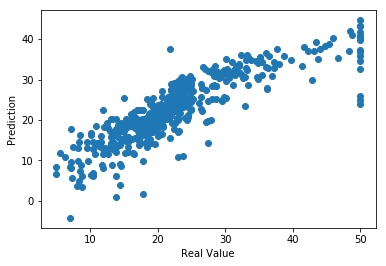

In [8]:
# 실제 값과 예측값 비교
predictions = model_boston.predict(X)

plt.scatter(y, predictions)
plt.xlabel(u"Real Value")
plt.ylabel(u"Prediction")
plt.show()